**<h1> Predicting Star Type using KNearestNeighbours**
    
This dataset is the best notebook for working on classification algorithms. One can use it to try and predict either Star type, Star Color or Spectral Class. In this notebook,we will be predicting the star type using KNearest Neighbours.There are 240 values in the dataset.
The dataset does not have any null values. Columns conatined in the dataset are:


*   Absolute Temperature (in K)
*   Relative Luminosity (L/Lo)
*   Relative Radius (R/Ro)
*    Absolute Magnitude (Mv)
*    Star Color (white,Red,Blue,Yellow,yellow-orange etc)
*    Spectral Class (O,B,A,F,G,K,,M)
*    Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)
    
If you want to know more about data , check it [here](https://www.kaggle.com/deepu1109/star-dataset).

**<h2> Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**<h2> Getting the CSV file**

In [2]:
stars=pd.read_csv("stars.csv")
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


**<h2> Data Preprocessing**

In [3]:
stars.shape

(240, 7)

**<h3> Checking for Null Values**
    
We will be checking for null values. If found , a necessary action will be taken.

In [4]:
def check_null():
    for i in stars.columns:
        print(i,":",stars[str(i)].isna().sum())
check_null()

Temperature (K) : 0
Luminosity(L/Lo) : 0
Radius(R/Ro) : 0
Absolute magnitude(Mv) : 0
Star type : 0
Star color : 0
Spectral Class : 0


**<h3> Star type Unique Values**
    
Through this we will be checking whether the dataset is balanced or not.

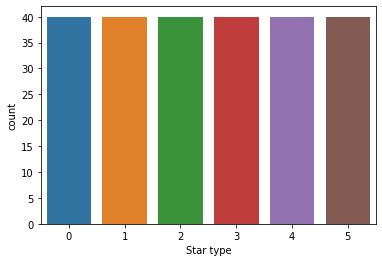

In [5]:
sns.countplot(stars['Star type'])

From the above countplot , we can see that all the unique values have been distributed equally. Hence, the dataset is balanced.

You can also check the same thing using value_counts function as shown below.

In [6]:
stars["Star type"].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

**<h3> Spectral Class unique values**

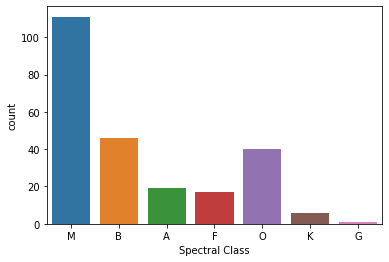

In [7]:
sns.countplot(stars['Spectral Class'])

From the above graph you can see that it is most likely for a spectral class of a star to belong to class M as it is the present in a huge number. If you go ahead to predict Spectral Class on this dataset, make sure that you balance the dataset a bit before starting out or your results will suffer due to a biased Machine Learning Model.


**<h3> Label Encoding Star Color and Spectral Class**
    
 Since, we will be doing Analysis further , Star Color and Spectral Class need to be assigned with numerical values instead of string. Lable Encoding helps us enable that.

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
stars['Star color']=label.fit_transform(stars['Star color'])

In [9]:
label2=LabelEncoder()
stars["Spectral Class"]=label.fit_transform(stars["Spectral Class"])

In [10]:
stars["Spectral Class"].value_counts()

5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: Spectral Class, dtype: int64

**<h2> Exploratory Data Analysis**
    
Data Analysis is generally performed with the aim of discovering more about the variables in the dataset and understanding which of them contribute more in the deciding the target variables. In this notebook, we are just doing EDA with the latter as our aim.

**<h3> Correalation Heatmap**
    
Don't get scared on seeing this. This is going to be your best friend in the field of Data Science. Correlation Heatmap helps you decide which features to drop as it shows the correlation variables share with.
This correlation is calculated using Pearson's coefficient.The variables sharing positive correlation are shaded brightly whereas the variables sharing negative relations are given a darker shade. Negative correlation does not imply that the features contribute nothing but instead shows that the two features in consideration grow inversely w.r.t each other.

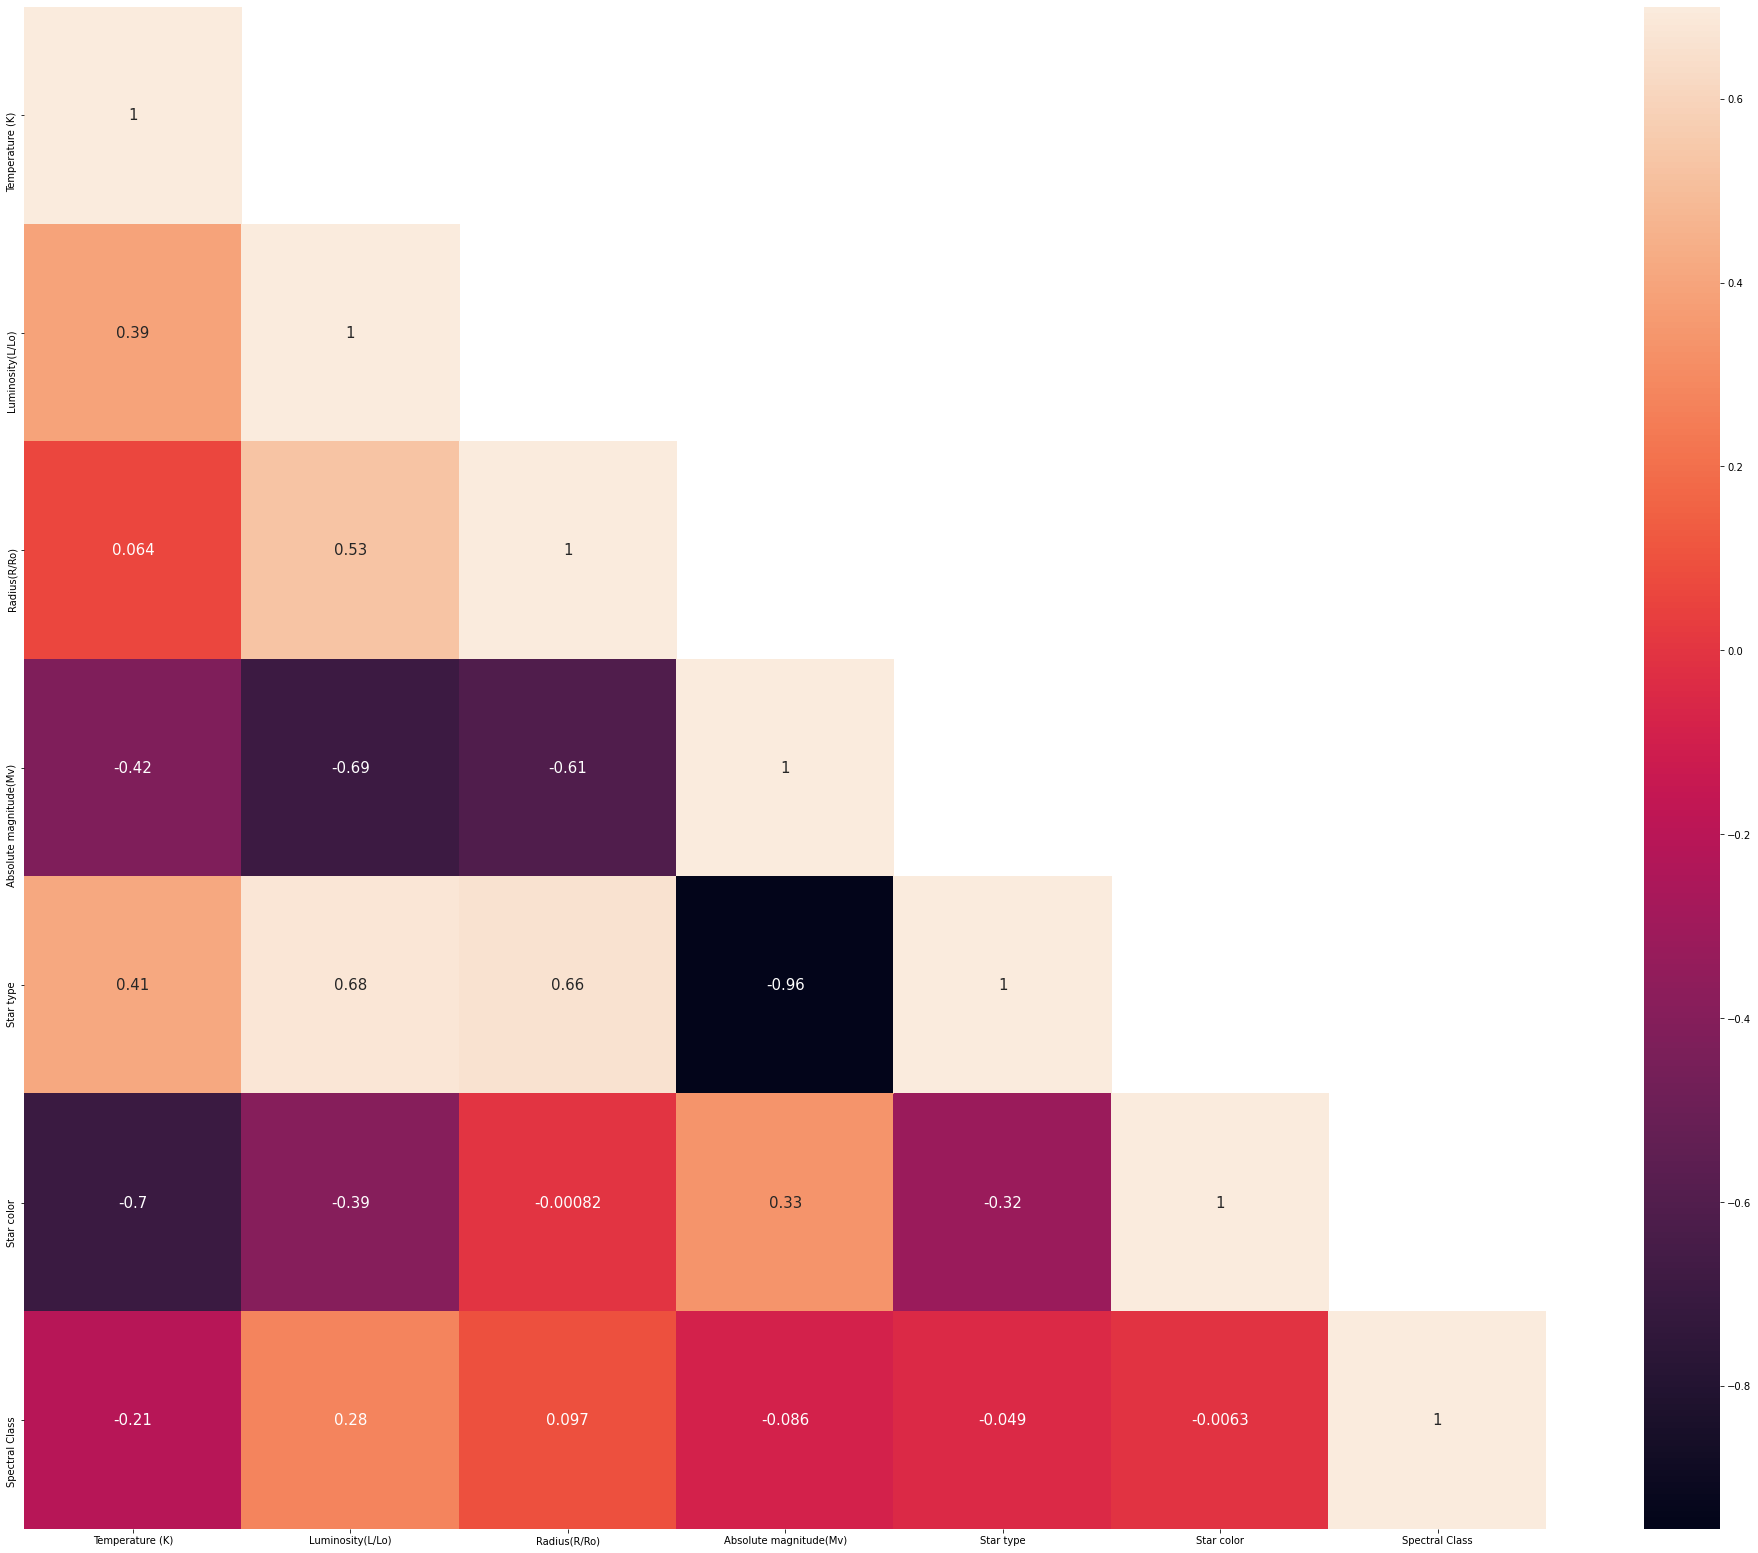

In [11]:
correlation_map = stars[stars.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True,annot_kws={"size": 15})

**<h3> Focused Correlation Heatmap**
    
If you find the above correlation heatmap a little confusing, you can use the below one which is simply w.r.t Star Type.

In [12]:
train=stars.drop(['Star type'],axis=1)
test=stars['Star type']
train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,10,5
1,3042,0.000500,0.1542,16.60,10,5
2,2600,0.000300,0.1020,18.70,10,5
3,2800,0.000200,0.1600,16.65,10,5
4,1939,0.000138,0.1030,20.06,10,5


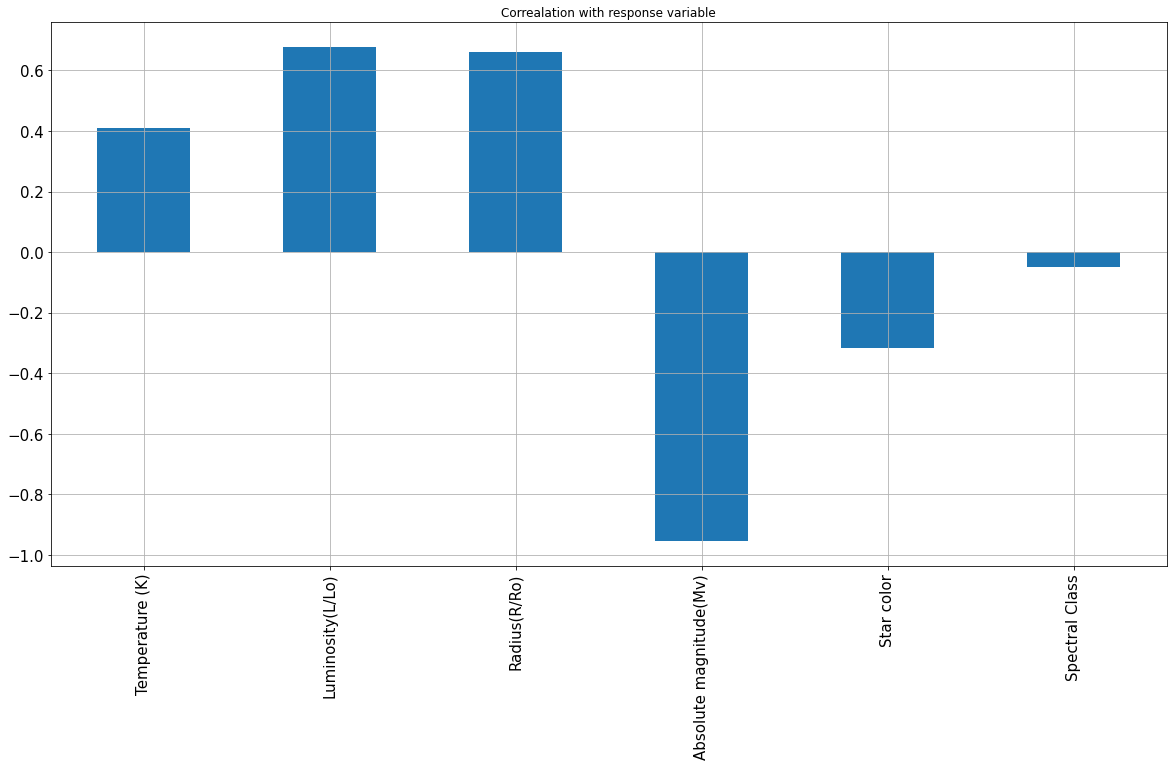

In [13]:
train.corrwith(test).plot.bar(figsize=(20,10),title="Correalation with response variable",fontsize=15,rot=90,grid=True)


**<h2> EDA Conclusion**


From the above analysis , we can see that the features Star Color and Spectral Class contribute nothing to Star Type. Hence we will be dropping these variables.

In [14]:
stars.drop(['Star color','Spectral Class'],inplace=True,axis=1)

In [15]:
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


**<h2> Preparing Dataset for Machine Learning**

First , we will be checking the ranges of our dataset. If they vary too much we will have to normalize them.

In [16]:
stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


We need to perform Normalization.

**<h3> Normalizing Data**

In [17]:
train=stars.drop(['Star type'],axis=1)
test=stars['Star type']

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train=sc.fit_transform(train)
train[:2]

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376]])

**<h2> Splitting Dataset for training and test data**

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,shuffle=True)

**<h2> Implementing KNeighbors Classifier**
    
The part we have all been waiting for. 
A small introduction to KNearest Neighours Algorithm to help you understand how things are working below.
Knearest neighbours is a method for classifying cases on the bases of their similarity to other cases. 
    
Consider a data value ‘x’ placed near 'n' certain values . The category of its closest neighbours is the one which will be assigned to it. I find that the quote, " a rotten apple spoils the whole barrel", quite relatable to this particular algorithm as the analogy proposed is on some grounds, similar. :))
    




In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       0.89      1.00      0.94         8
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00         6

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



The metric classification_report provides us with an overall grade-card of the performance of our model. From this , you can see that the accuracy obtained is 96%, which is quite good.

**<h1>Conclusion**
    
    
We got a good accuracy of 96% and learnt that variables Star Color and Spectral Class do not share much of a relation with Star type.Although in theory the opposite is true. The reason this correlation amongst the above variables ceased to exit is because each of these variables in the dataset are presented as probable target variables. 